# **Basic Classification Using GaussianNB 2 class**

In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd
df = pd.read_csv('content/Cleaned_Medical_Data.csv', encoding='unicode_escape')
print(df)

def transform_column(column, mean, std):
    return column > (mean + std)

df['mbi_ex'] = transform_column(df['mbi_ex'], mean=16.8, std=5.1)
df['mbi_cy'] = transform_column(df['mbi_cy'], mean=10.0, std=4.5)
df['mbi_ea'] = transform_column(df['mbi_ea'], mean=24.3, std=4.6)


X = df.drop(['mbi_ex', 'year', 'sex', 'glang', 'part', 'job', 'health', 'psyt', 'mbi_ea'], axis=1)
y = df['mbi_ex']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(y.value_counts())


     age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0     26     4    1      1     1    0      20       4     0   109        55   
1     21     3    2      1     0    0      36       3     0   106        64   
2     21     2    2      1     0    1      51       5     0   101        52   
3     21     3    1      1     1    0      22       4     0   102        58   
4     26     5    2      1     1    1      10       2     0   102        48   
..   ...   ...  ...    ...   ...  ...     ...     ...   ...   ...       ...   
825   21     2    1      1     1    0      45       3     0   106        63   
826   20     2    2      1     0    0      13       3     0   113        67   
827   19     1    1      1     0    0      50       5     0   100        50   
828   24     5    2      1     0    0      20       2     1   120        64   
829   22     3    1      1     0    1      20       5     0   102        54   

     qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_e

# **Basic Classification Using GaussianNB 3 class**

In [29]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import pandas as pd

df = pd.read_csv('content/Cleaned_Medical_Data.csv', encoding='unicode_escape')
print(df)

features = df.columns

def transform_column(column, mean, std):
    def transform(value):
        if value > (mean + std):
            return 1
        elif value < (mean - std):
            return -1
        else:
            return 0

    return column.apply(transform)

df['mbi_ex'] = transform_column(df['mbi_ex'], mean=16.8, std=5.1)
df['mbi_cy'] = transform_column(df['mbi_cy'], mean=10.0, std=4.5)
df['mbi_ea'] = transform_column(df['mbi_ea'], mean=24.3, std=4.6)

X = df.drop(['mbi_ea'], axis=1)
y = df['mbi_ea']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

gnb = GaussianNB(priors=[0.16, 0.63, 0.21]) # weights
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)
print(y.value_counts())
print(confusion_matrix(y_test, y_pred))


     age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0     26     4    1      1     1    0      20       4     0   109        55   
1     21     3    2      1     0    0      36       3     0   106        64   
2     21     2    2      1     0    1      51       5     0   101        52   
3     21     3    1      1     1    0      22       4     0   102        58   
4     26     5    2      1     1    1      10       2     0   102        48   
..   ...   ...  ...    ...   ...  ...     ...     ...   ...   ...       ...   
825   21     2    1      1     1    0      45       3     0   106        63   
826   20     2    2      1     0    0      13       3     0   113        67   
827   19     1    1      1     0    0      50       5     0   100        50   
828   24     5    2      1     0    0      20       2     1   120        64   
829   22     3    1      1     0    1      20       5     0   102        54   

     qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_e

# **Basic Classification Using GaussianNB 3 class + SMOT**

In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE, BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

df = pd.read_csv('content/Cleaned_Medical_Data.csv', encoding='unicode_escape')
print(df)

def transform_column(column, mean, std):
    def transform(value):
        if value > (mean + std):
            return 1
        elif value < (mean - std):
            return -1
        else:
            return 0

    return column.apply(transform)

df['mbi_ex'] = transform_column(df['mbi_ex'], mean=16.8, std=5.1)
df['mbi_cy'] = transform_column(df['mbi_cy'], mean=10.0, std=4.5)
df['mbi_ea'] = transform_column(df['mbi_ea'], mean=24.3, std=4.6)

X = df.drop(['year', 'sex', 'glang', 'part', 'job', 'health', 'psyt', 'mbi_cy', 'mbi_ea', 'mbi_ex'], axis=1)
y = df['mbi_ex']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Original class distribution:", Counter(y_train))

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Resampled class distribution:", Counter(y_train_resampled))

prior_class_0 = 0.16
prior_class_1 = 0.63
prior_class_2 = 0.21

gnb = GaussianNB(priors=[prior_class_0, prior_class_1, prior_class_2])
gnb.fit(X_train_resampled, y_train_resampled)

y_pred = gnb.predict(X_test)

print("Test set predictions class distribution:", Counter(y_pred))

from sklearn.metrics import confusion_matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


     age  year  sex  glang  part  job  stud_h  health  psyt  jspe  qcae_cog  \
0     26     4    1      1     1    0      20       4     0   109        55   
1     21     3    2      1     0    0      36       3     0   106        64   
2     21     2    2      1     0    1      51       5     0   101        52   
3     21     3    1      1     1    0      22       4     0   102        58   
4     26     5    2      1     1    1      10       2     0   102        48   
..   ...   ...  ...    ...   ...  ...     ...     ...   ...   ...       ...   
825   21     2    1      1     1    0      45       3     0   106        63   
826   20     2    2      1     0    0      13       3     0   113        67   
827   19     1    1      1     0    0      50       5     0   100        50   
828   24     5    2      1     0    0      20       2     1   120        64   
829   22     3    1      1     0    1      20       5     0   102        54   

     qcae_aff  amsp  erec_mean  cesd  stai_t  mbi_e

# **Metrics print**

Accuracy: 0.6385542168674698
              precision    recall  f1-score   support

          -1       0.52      0.64      0.57        25
           0       0.69      0.74      0.72       101
           1       0.56      0.38      0.45        40

    accuracy                           0.64       166
   macro avg       0.59      0.59      0.58       166
weighted avg       0.63      0.64      0.63       166



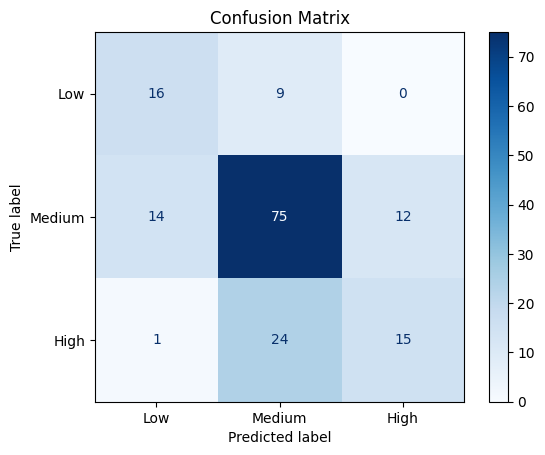

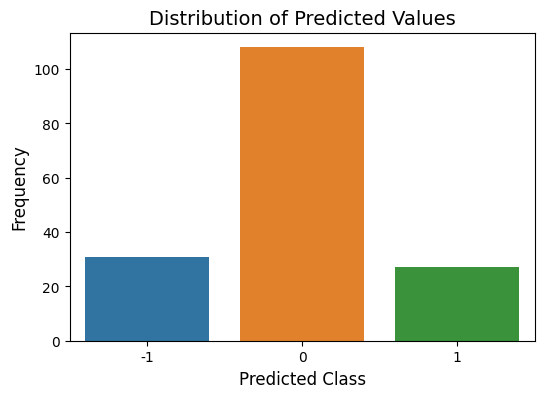

In [31]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
import seaborn as sns
import numpy as np
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred, zero_division=1))
# gnb.score(X_train, y_train)

class_names = ['Low', 'Medium', 'High']

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
cm_display.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

# Plotting the distribution of predicted values
plt.figure(figsize=(6, 4))
sns.countplot(x=y_pred)
plt.title('Distribution of Predicted Values', fontsize=14)
plt.xlabel('Predicted Class', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



# **Hyperparameter Tuning using cross validation**
I used this video https://www.youtube.com/watch?v=T6OxPncD7_w

In [32]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Expanded hyperparameter grid for GaussianNB
param_grid = {
    'var_smoothing': np.logspace(-10, 0, 100)
}

# GridSearchCV with stratified (cv)k-fold cross-validation
grid_search = GridSearchCV(GaussianNB(), param_grid, cv=5, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train, y_train)

print(f"Best hyperparameters: {grid_search.best_params_}")

best_gnb = grid_search.best_estimator_

y_pred = best_gnb.predict(X_test)

accuracy_best = accuracy_score(y_test, y_pred)
print(f'Best Model Accuracy: {accuracy_best}')

print(classification_report(y_test, y_pred, zero_division=1))

Best hyperparameters: {'var_smoothing': 0.2477076355991714}
Best Model Accuracy: 0.6927710843373494
              precision    recall  f1-score   support

          -1       0.76      0.52      0.62        25
           0       0.69      0.91      0.78       101
           1       0.67      0.25      0.36        40

    accuracy                           0.69       166
   macro avg       0.71      0.56      0.59       166
weighted avg       0.69      0.69      0.66       166



# **PCA**

In [33]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensionality
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


gnb.fit(X_train_pca, y_train)

y_pred_pca = gnb.predict(X_test_pca)

# Accuracy and evaluation with PCA
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f'Accuracy with PCA: {accuracy_pca}')
print(classification_report(y_test, y_pred_pca))




Accuracy with PCA: 0.6807228915662651
              precision    recall  f1-score   support

          -1       0.69      0.36      0.47        25
           0       0.69      0.89      0.78       101
           1       0.64      0.35      0.45        40

    accuracy                           0.68       166
   macro avg       0.67      0.53      0.57       166
weighted avg       0.68      0.68      0.65       166



#### SHAP

True positive


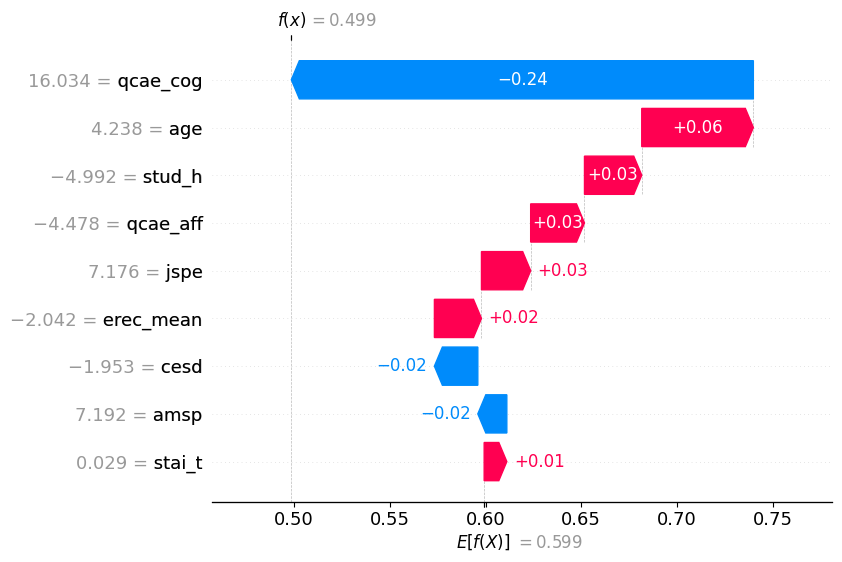

False positive


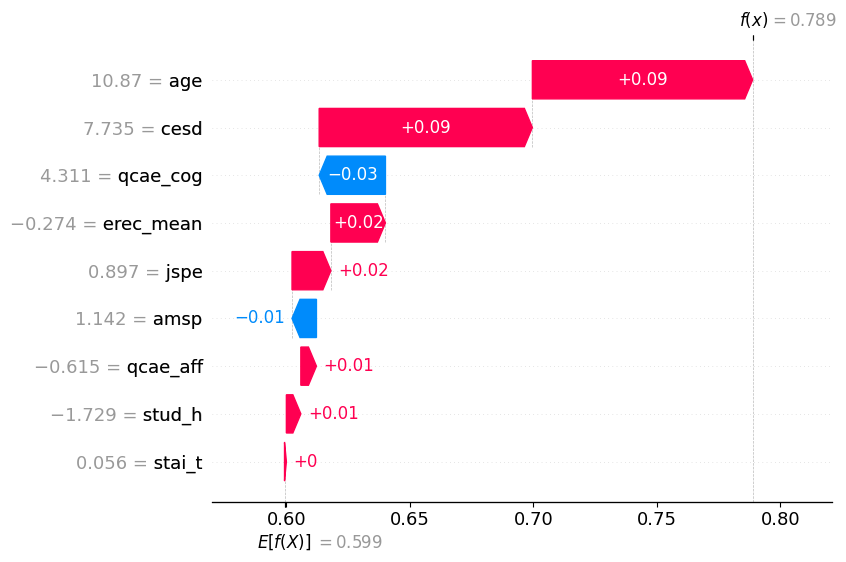

True negative


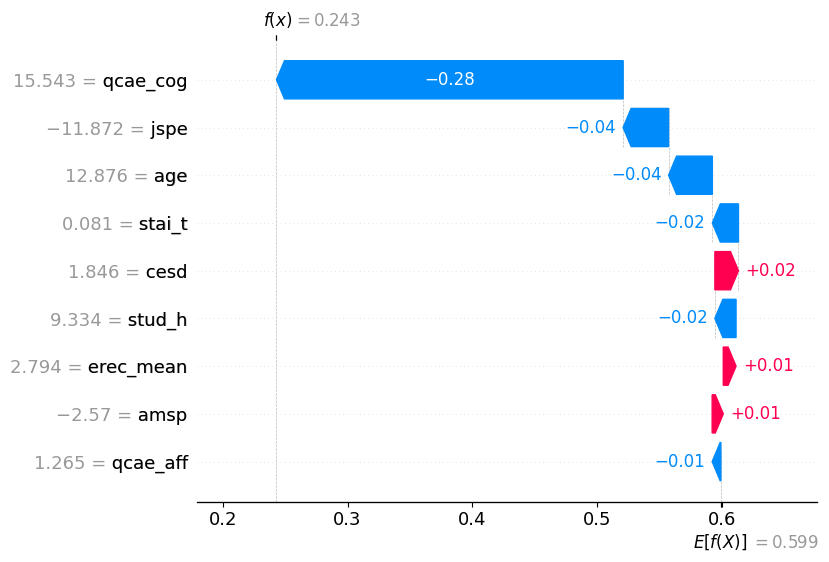

False negative


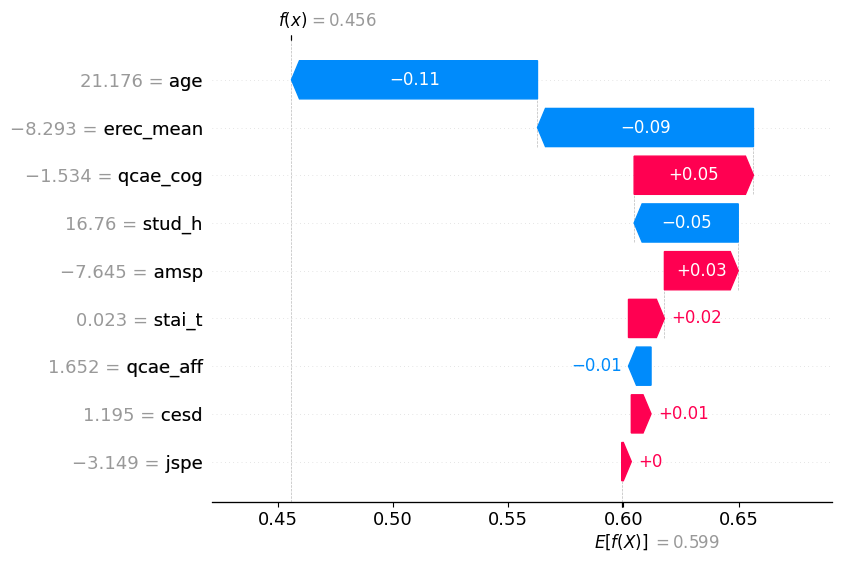

In [34]:
import shap

# Create feature names for the PCA components
feature_names = df.drop(['year', 'sex', 'glang', 'part', 'job', 'health', 'psyt', 'mbi_cy', 'mbi_ea', 'mbi_ex'], axis=1).columns

# Convert X_test_pca into a pandas DataFrame with proper column names
X_test_pca_df = pd.DataFrame(X_test_pca, columns=feature_names)

# Find specific cases for TP, FP, TN, FN
y_test = y_test.reset_index(drop=True)  # Reset index for easier comparison

# Conditions
tp_index = y_test[(y_test == 0) & (y_pred_pca == 0)].index[0]
fp_index = y_test[(y_test != 0) & (y_pred_pca == 0)].index[0]
tn_index = y_test[(y_test != 0) & (y_pred_pca != 0)].index[0]
fn_index = y_test[(y_test == 0) & (y_pred_pca != 0)].index[0]

# print("True Positive (TP):", df.iloc[tp_index])
# print("False Positive (FP):", df.iloc[fp_index])
# print("True Negative (TN):", df[tn_index])
# print("False Negative (FN):", df[fn_index])

explainer = shap.Explainer(gnb.predict_proba, X_train_pca)
shap_values = explainer(X_test_pca)

# True Positive (TP)
print("True positive")
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[tp_index].values[:, 1], 
        base_values=shap_values[tp_index].base_values[1], 
        data=X_test_pca_df.iloc[tp_index],
        feature_names=feature_names
    )
)

# False Positive (FP)
print("False positive")
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[fp_index].values[:, 1],
        base_values=shap_values[fp_index].base_values[1],
        data=X_test_pca_df.iloc[fp_index],
        feature_names=feature_names
    )
)

# True Negative (TN)
print("True negative")
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[tn_index].values[:, 1],
        base_values=shap_values[tn_index].base_values[1], 
        data=X_test_pca_df.iloc[tn_index], 
        feature_names=feature_names 
    )
)

# False Negative (FN)
print("False negative")
shap.waterfall_plot(
    shap.Explanation(
        values=shap_values[fn_index].values[:, 1], 
        base_values=shap_values[fn_index].base_values[1], 
        data=X_test_pca_df.iloc[fn_index],
        feature_names=feature_names
    )
)

#### Counterfactuals

In [35]:
import numpy as np
import pandas as pd

def generate_counterfactual(model, X_input, feature_to_change, direction, step_size=0.1, max_steps=100):
    # Ensure X_input is a DataFrame
    if isinstance(X_input, np.ndarray):
        X_input = pd.DataFrame(X_input)

    entry = 0
    
    original_prediction = model.predict(X_input)[entry]  # Original prediction

    # Convert feature to change to index if it's given as name
    if isinstance(feature_to_change, str):
        feature_to_change = X_input.columns.get_loc(feature_to_change)

    # Initialize counterfactual as a copy of the input
    counterfactual = X_input.copy()

    # Determine the current value of the feature to change
    original_value = counterfactual.iloc[entry, feature_to_change]

    change_rate = original_value * step_size

    # Modify the feature value incrementally
    for step in range(max_steps):
        # Modify the feature
        if direction == 'increase':
            counterfactual.iloc[entry, feature_to_change] = original_value + change_rate
        elif direction == 'decrease':
            counterfactual.iloc[entry, feature_to_change] = original_value - change_rate

        # Predict with the modified instance
        new_prediction = model.predict(counterfactual)[entry]
        
        # If the prediction changes, stop and return the counterfactual
        if new_prediction != original_prediction:
            print(f"Prediction changed from {original_prediction} to {new_prediction} after {step+1} steps.")
            return counterfactual, new_prediction
    
    # If no change is detected, return the modified counterfactual
    print(f"Counterfactual generation for {feature_to_change} did not change after {max_steps * 10}% {direction}.")
    # return counterfactual, new_prediction


pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

X_train_pca_df = pd.DataFrame(X_train_pca, columns=feature_names)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=feature_names)


gnb.fit(X_train_pca_df, y_train)

for feature in feature_names:
    print(feature)
    generate_counterfactual(gnb, X_test_pca_df, feature, 'increase', step_size=0.1, max_steps=100)
    generate_counterfactual(gnb, X_test_pca_df, feature, 'decrease', step_size=0.1, max_steps=100)
# X_test_pca_df

age
Counterfactual generation for 0 did not change after 1000% increase.
Counterfactual generation for 0 did not change after 1000% decrease.
stud_h
Counterfactual generation for 1 did not change after 1000% increase.
Counterfactual generation for 1 did not change after 1000% decrease.
jspe
Counterfactual generation for 2 did not change after 1000% increase.
Counterfactual generation for 2 did not change after 1000% decrease.
qcae_cog
Prediction changed from 0 to 1 after 1 steps.
Counterfactual generation for 3 did not change after 1000% decrease.
qcae_aff
Counterfactual generation for 4 did not change after 1000% increase.
Counterfactual generation for 4 did not change after 1000% decrease.
amsp
Counterfactual generation for 5 did not change after 1000% increase.
Counterfactual generation for 5 did not change after 1000% decrease.
erec_mean
Counterfactual generation for 6 did not change after 1000% increase.
Counterfactual generation for 6 did not change after 1000% decrease.
cesd
Cou